## SIMPLE REGRESSION MODEL

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df=pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'scatter graph')

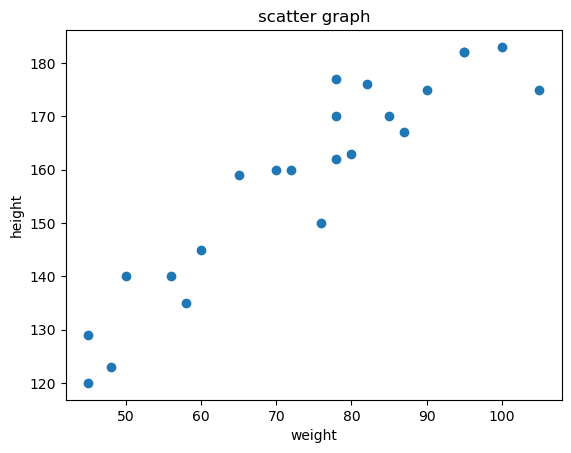

In [5]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("weight")
plt.ylabel("height")
plt.title("scatter graph")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [7]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [8]:
df.isnull().sum() # no null value is present 

Weight    0
Height    0
dtype: int64

## Dividing our dataset into independent and dependent features

In [9]:
X=df[['Weight']] # independent features 
y=df['Height'] # dependent features

In [11]:
X.shape 
y.shape

(23,)

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [19]:
X_test.shape, X_train.shape

((5, 1), (18, 1))

In [20]:
y_test.shape, y_train.shape

((5,), (18,))

## SCALING

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler()

In [23]:
X_train=scaler.fit_transform(X_train)

In [24]:
X_test=scaler.transform(X_test)

In [25]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

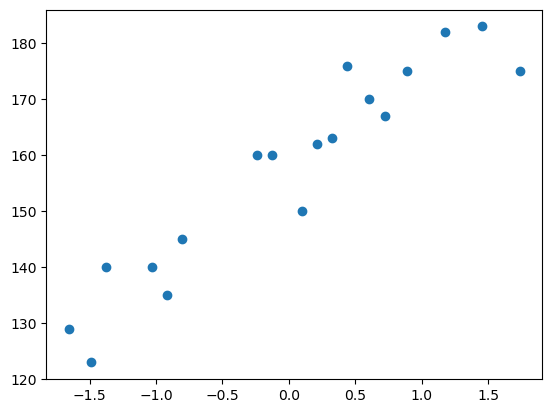

In [26]:
plt.scatter(X_train,y_train)

## Model Training 

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
regressor=LinearRegression()

In [30]:
regressor.fit(X_train,y_train)

LinearRegression()

In [31]:
regressor.intercept_

157.5

In [32]:
regressor.coef_

array([17.03440872])

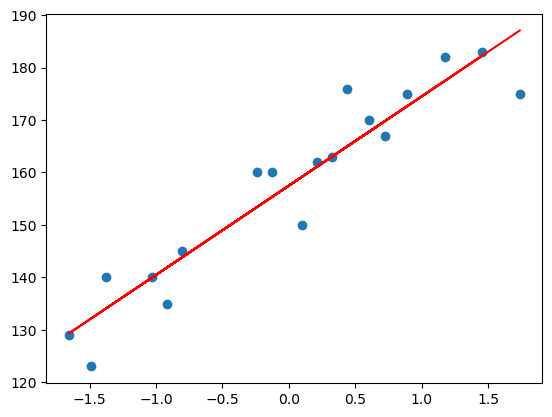

In [33]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [34]:
y_test_pred=regressor.predict(X_test)

In [35]:
y_test_pred

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [36]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

## Performance Metrics MAE,MSE,RMSE

In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [39]:
mse=mean_squared_error(y_test,y_test_pred)
mae=mean_absolute_error(y_test,y_test_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


## Accuracy of the model R squared and Adjusted r ssquared
## R square

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_test_pred)
score